# Medical Image Analysis Project: Pneumonia Detection

## Overview
In this capstone project, you will apply the deep learning techniques learned in this course to a real-world medical imaging problem: **Pneumonia Detection from Chest X-Rays**.

Specifically, you will work with the **PneumoniaMNIST** dataset, a binary classification subset of the MedMNIST collection. Your goal is to build a robust classifier that distinguishes between 'Normal' and 'Pneumonia' cases.

Unlike previous tutorials where models were prescribed, **you interpret the data and choose the model architecture** best suited for the task. You will be evaluated not just on accuracy, but on your design choices, rigorous evaluation, and interpretability of results.

## 1. Setup and Data Loading
First, we install and load the necessary libraries. We rely on `medmnist` for data retrieval and `torch` for modeling.

In [1]:
!pip install medmnist # Uncomment if running in Colab

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import medmnist
from medmnist import INFO, Evaluator
import matplotlib.pyplot as plt
import numpy as np

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.__file__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 kB 8.5 MB/s eta 0:00:00
MedMNIST v3.0.2 @ /usr/local/lib/python3.12/dist-packages/medmnist/__init__.py


### Data Understanding
We use **PneumoniaMNIST**, which contains cropped chest X-ray images. The task is binary classification: **0 (Normal)** vs **1 (Pneumonia)**.

In [2]:
data_flag = 'pneumoniamnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# Basic transform for visualization/baseline
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

100%|██████████| 4.17M/4.17M [00:01<00:00, 3.35MB/s]


Train samples: 4708
Val samples: 524
Test samples: 624


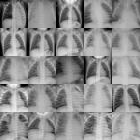

In [3]:
# Visualization of samples
train_dataset.montage(length=5)

### Class Distribution Analysis
Before proceeding, it is crucial to understand if our classes are balanced. Imbalanced datasets can lead to biased models that predict the majority class. Check the counts below.

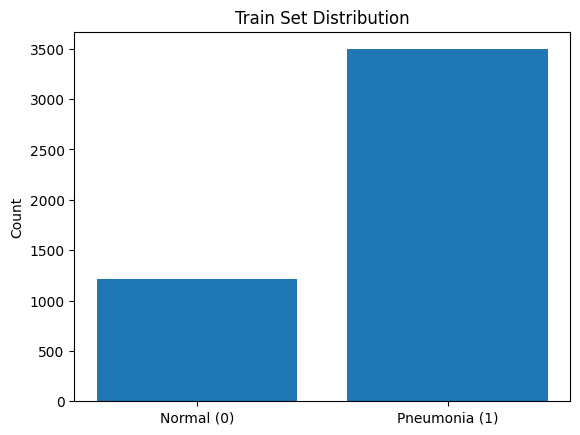

Counts: {'Normal': np.int64(1214), 'Pneumonia': np.int64(3494)}


In [4]:
# Analyze Class Distribution
def plot_class_distribution(dataset, title='Class Distribution'):
    targets = [y for _, y in dataset]
    targets = np.array(targets).squeeze()
    unique, counts = np.unique(targets, return_counts=True)
    plt.bar(unique, counts)
    plt.xticks(unique, ['Normal (0)', 'Pneumonia (1)'])
    plt.title(title)
    plt.ylabel('Count')
    plt.show()
    print(f"Counts: {dict(zip(['Normal', 'Pneumonia'], counts))}")

plot_class_distribution(train_dataset, 'Train Set Distribution')

## 2. Project Requirements

You are required to complete the following tasks to structure your project. Please document your process clearly in markdown cells alongside your code.

### 1. Define the Problem Statement
- Clearly state the medical problem you are solving (Pneumonia Detection).
- Explain why this is important and what the clinical impact of an automated solution could be.
- Describe the dataset characteristics (size, class balance, image type).

### 2. Choose an Architecture / Approach
- Select a modeling approach. You may choose:
    - One of the architectures explored in `Building_Models.ipynb` (e.g., Simple CNN, Radiomics-based RF, Contrastive Learning).
    - An alternative architecture (e.g., ResNet, DenseNet, Vision Transformer) if you wish to explore further.
- **Justify your choice**: Why is this model suitable for this specific task and dataset?

### 3. Hyperparameter Tuning
- Experiment with key hyperparameters to optimize performance.
- Consider tuning: Learning rate, Batch size, Number of epochs, Optimizer type (Adam vs SGD), Dropout rate, etc.
- Document your tuning process and the final set of hyperparameters selected.

### 4. Training Analysis
- Implement a training loop that tracks performance on both Training and Validation sets.
- **Produce a Training Loss Curve**: Plot training and validation loss over epochs to diagnose overfitting or underfitting.

### 5. Evaluation and Metrics
- Evaluate your best model on the **Test Set**.
- **Produce an ROC Curve**: Plot the Receiver Operating Characteristic curve.
- Report key metrics:
    - **AUC (Area Under Curve)**
    - **F1-Score**
    - **Sensitivity (Recall)** and **Specificity**

### 6. Extensions, Limitations, and Implications
- **Extensions**: How could this model be improved further? (e.g., more data, ensemble methods, external validation).
- **Limitations**: What are the current weaknesses of your solution? (e.g., class imbalance handling, robustness to noise, generalization).
- **Implications**: Discuss the ethical and practical implications of deploying this AI model in a real clinical setting (e.g., bias, explainability, doctor-AI collaboration).

## 3. Student Workspace
Implement your solution below.

In [5]:
# Your code starts here
# Good luck!

## Prepare Dataset

In [6]:
# ========================================
# 2. Prepare Dataset
# ========================================

print("Loading PneumoniaMNIST...")

# Use the PneumoniaMNIST dataset (already binary: 0=Normal, 1=Pneumonia)
from medmnist import PneumoniaMNIST

# Transform for grayscale chest X-ray images (1 channel)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load PneumoniaMNIST datasets
train_dataset = PneumoniaMNIST(split='train', transform=transform, download=True)
val_dataset = PneumoniaMNIST(split='val', transform=transform, download=True)
test_dataset = PneumoniaMNIST(split='test', transform=transform, download=True)

print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)

print("Datasets and loaders ready.")


Loading PneumoniaMNIST...
Train samples: 4708
Val samples: 524
Test samples: 624
Datasets and loaders ready.


Using device: cuda
Epoch 1/5 | Loss: 0.4756
Epoch 2/5 | Loss: 0.2854
Epoch 3/5 | Loss: 0.2272
Epoch 4/5 | Loss: 0.2178
Epoch 5/5 | Loss: 0.2152

📈 Pneumonia Detection - Small 3-Layer CNN Results:
              precision    recall  f1-score   support

           0     0.9231    0.7692    0.8392       234
           1     0.8741    0.9615    0.9158       390

    accuracy                         0.8894       624
   macro avg     0.8986    0.8654    0.8775       624
weighted avg     0.8925    0.8894    0.8870       624

ROC AUC: 0.9494
Precision: 0.8741
Recall: 0.9615
F1 Score: 0.9158


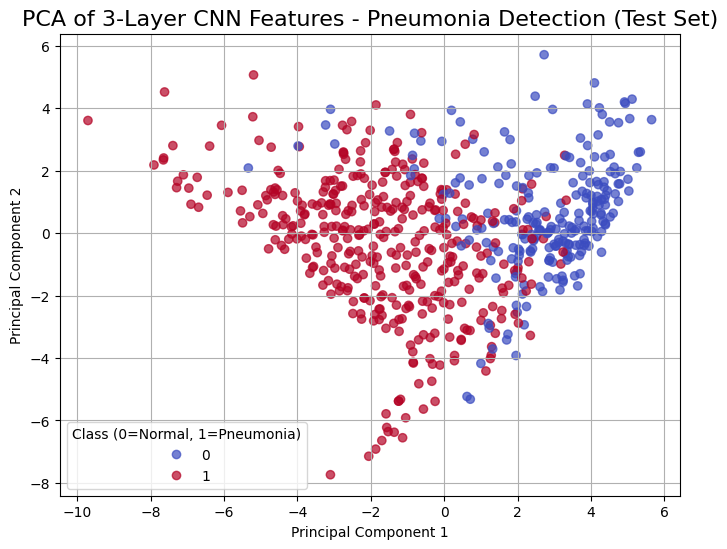

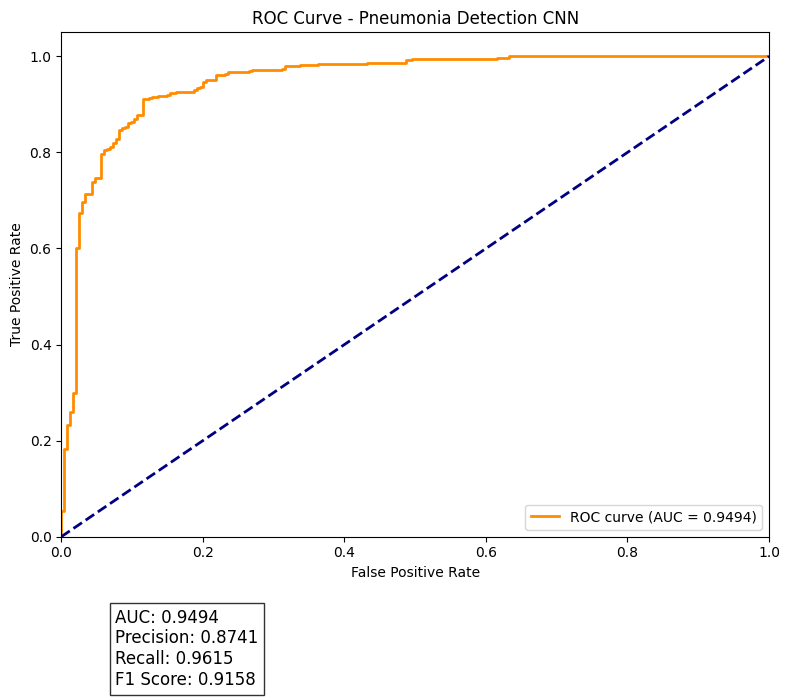

In [7]:
# ========================================
# 4. Small 3-Layer CNN Classifier (with ROC AUC)
# ========================================

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Import metrics
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, classification_report, roc_curve
from sklearn.decomposition import PCA

# Define model (1 input channel for grayscale X-ray images)
class SmallCNN(nn.Module):
    def __init__(self):
        super(SmallCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),  # 1 channel for grayscale
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1,1))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = SmallCNN().to(device)

# Training setup
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Train loop
def train_model(model, loader, optimizer, criterion, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.squeeze().long().to(device)  # Squeeze and convert to long
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss/len(loader):.4f}")

train_model(model, train_loader, optimizer, criterion, epochs=5)

# Evaluation
def evaluate_model(model, loader):
    model.eval()
    all_preds, all_labels, all_probs, all_features = [], [], [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.squeeze().numpy()  # Squeeze labels to 1D
            outputs = model(imgs)
            probs = torch.softmax(outputs, dim=1)[:,1]  # Probabilities for class 1 (Pneumonia)
            preds = torch.argmax(outputs, dim=1)

            all_preds.append(preds.cpu().numpy())
            all_probs.append(probs.cpu().numpy())
            all_labels.append(labels)
            all_features.append(model.features(imgs).view(imgs.size(0), -1).cpu().numpy())

    return (np.concatenate(all_labels),
            np.concatenate(all_preds),
            np.concatenate(all_probs),
            np.vstack(all_features))

y_true, y_pred, y_probs, test_features = evaluate_model(model, test_loader)

# Metrics
roc_auc = roc_auc_score(y_true, y_probs)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("\n📈 Pneumonia Detection - Small 3-Layer CNN Results:")
print(classification_report(y_true, y_pred, digits=4))
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# PCA Visualization
pca = PCA(n_components=2)
test_features_pca = pca.fit_transform(test_features)

plt.figure(figsize=(8,6))
scatter = plt.scatter(test_features_pca[:,0], test_features_pca[:,1], c=y_true, cmap='coolwarm', alpha=0.7)
plt.title('PCA of 3-Layer CNN Features - Pneumonia Detection (Test Set)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Class (0=Normal, 1=Pneumonia)")
plt.grid(True)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Pneumonia Detection CNN')
plt.legend(loc='lower right')

# Add metrics box
metrics_text = (
    f"AUC: {roc_auc:.4f}\n"
    f"Precision: {precision:.4f}\n"
    f"Recall: {recall:.4f}\n"
    f"F1 Score: {f1:.4f}"
)
plt.gcf().text(0.15, -0.15, metrics_text, fontsize=12, bbox=dict(facecolor='white', alpha=0.8), ha='left')

plt.tight_layout()
plt.show()


Using device: cuda
MedNet Parameters: 98,579

🚀 Training MedNet...
Epoch 1/20 | Train Loss: 0.0869 | Val Loss: 0.0342 | LR: 0.000298
Epoch 2/20 | Train Loss: 0.0422 | Val Loss: 0.0333 | LR: 0.000293
Epoch 3/20 | Train Loss: 0.0342 | Val Loss: 0.0306 | LR: 0.000284
Epoch 4/20 | Train Loss: 0.0285 | Val Loss: 0.0229 | LR: 0.000271
Epoch 5/20 | Train Loss: 0.0214 | Val Loss: 0.0222 | LR: 0.000256
Epoch 6/20 | Train Loss: 0.0203 | Val Loss: 0.0194 | LR: 0.000238
Epoch 7/20 | Train Loss: 0.0164 | Val Loss: 0.0182 | LR: 0.000218
Epoch 8/20 | Train Loss: 0.0147 | Val Loss: 0.0198 | LR: 0.000197
Epoch 9/20 | Train Loss: 0.0117 | Val Loss: 0.0168 | LR: 0.000174
Epoch 10/20 | Train Loss: 0.0107 | Val Loss: 0.0254 | LR: 0.000150
Epoch 11/20 | Train Loss: 0.0095 | Val Loss: 0.0173 | LR: 0.000127
Epoch 12/20 | Train Loss: 0.0076 | Val Loss: 0.0169 | LR: 0.000104
Epoch 13/20 | Train Loss: 0.0071 | Val Loss: 0.0170 | LR: 0.000083
Epoch 14/20 | Train Loss: 0.0062 | Val Loss: 0.0165 | LR: 0.000063
Epoc

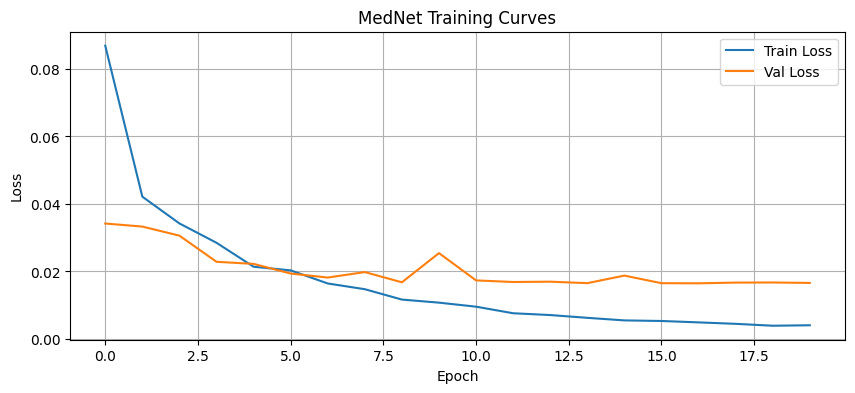


📈 Pneumonia Detection - MedNet Results:
              precision    recall  f1-score   support

      Normal     0.9795    0.6111    0.7526       234
   Pneumonia     0.8096    0.9923    0.8917       390

    accuracy                         0.8494       624
   macro avg     0.8945    0.8017    0.8222       624
weighted avg     0.8733    0.8494    0.8396       624

ROC AUC: 0.9608
Precision: 0.8096
Recall (Sensitivity): 0.9923
Specificity: 0.6111
F1 Score: 0.8917


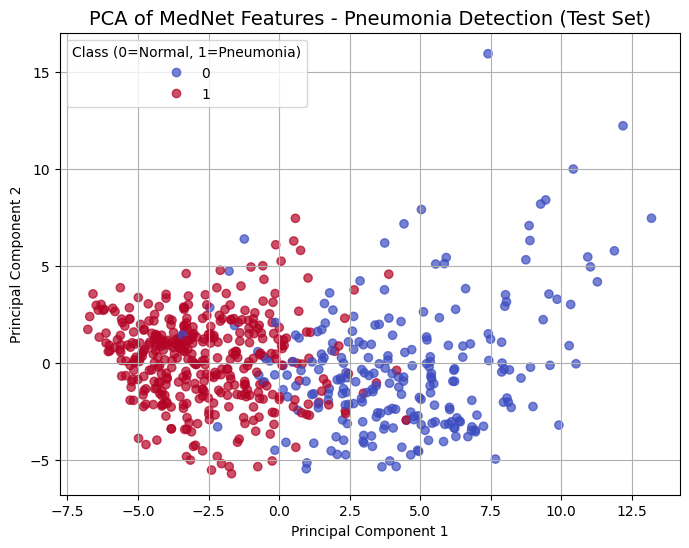

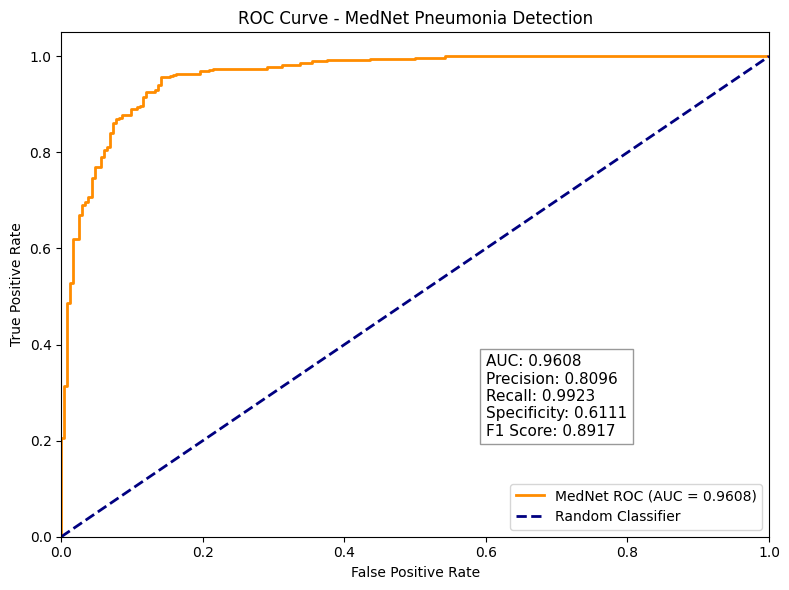

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# ======================================== #
#               MedNet Model               #
# ======================================== #

class AttentionModule(nn.Module):
    def __init__(self, channels):
        super(AttentionModule, self).__init__()
        self.conv_query = nn.Conv2d(channels, channels // 8, kernel_size=1)
        self.conv_key = nn.Conv2d(channels, channels // 8, kernel_size=1)
        self.conv_value = nn.Conv2d(channels, channels, kernel_size=1)
        self.softmax = nn.Softmax(dim=-1)
        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        batch_size, C, H, W = x.size()
        query = self.conv_query(x).view(batch_size, -1, H * W).permute(0, 2, 1) # B, HW, C/8
        key = self.conv_key(x).view(batch_size, -1, H * W) # B, C/8, HW

        energy = torch.bmm(query, key) # B, HW, HW
        attention = self.softmax(energy)

        value = self.conv_value(x).view(batch_size, -1, H * W) # B, C, HW

        out = torch.bmm(value, attention.permute(0, 2, 1)) # B, C, HW
        out = out.view(batch_size, C, H, W)

        out = self.gamma * out + x
        return out

class MedNet(nn.Module):
    def __init__(self, in_channels, num_classes, dropout=0.5):
        super(MedNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            AttentionModule(64), # Attention module

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.AdaptiveAvgPool2d((1, 1)) # Global Average Pooling
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

    def get_features(self, x):
        # This method is used to extract features before the final classification layer
        return self.features(x).view(x.size(0), -1)

# ======================================== #
#              FocalLoss Function          #
# ======================================== #

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduction == 'mean':
            return torch.mean(F_loss)
        elif self.reduction == 'sum':
            return torch.sum(F_loss)
        else:
            return F_loss

# ======================================== #
#            Utility Function              #
# ======================================== #

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# ======================================== #
# 5. MedNet Classifier (with ROC AUC)      #
# ======================================== #
# MedNet: Lightweight Attention-Augmented CNN for Medical Image Classification
# Paper: https://www.nature.com/articles/s41598-025-25857-w

# Import the MedNet model and FocalLoss from models.py
# from models import MedNet, FocalLoss, count_parameters # No longer needed as defined above

# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create MedNet model (1 input channel for grayscale, 2 classes for binary classification)
mednet_model = MedNet(
    in_channels=1,    # Grayscale chest X-rays
    num_classes=2,    # Normal vs Pneumonia
    dropout=0.4
).to(device)

print(f"MedNet Parameters: {count_parameters(mednet_model):,}")

# Training setup - using recommended hyperparameters from the paper
optimizer_mednet = torch.optim.AdamW(
    mednet_model.parameters(),
    lr=3e-4,
    weight_decay=1e-4
)

# Use FocalLoss to handle class imbalance (more Pneumonia than Normal cases)
criterion_mednet = FocalLoss(alpha=1, gamma=2)

# Learning rate scheduler (Cosine Annealing as per paper)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer_mednet,
    T_max=20,
    eta_min=1e-6
)

# Training loop with validation tracking
def train_mednet(model, train_loader, val_loader, optimizer, criterion, scheduler, epochs=20):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device)
            labels = labels.squeeze().long().to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs = imgs.to(device)
                labels = labels.squeeze().long().to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss = val_loss / len(val_loader)
        val_losses.append(val_loss)

        # Update learning rate
        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | LR: {scheduler.get_last_lr()[0]:.6f}")

    return train_losses, val_losses

# Train MedNet
print("\n🚀 Training MedNet...")
train_losses, val_losses = train_mednet(
    mednet_model, train_loader, val_loader,
    optimizer_mednet, criterion_mednet, scheduler,
    epochs=20
)

# Plot training curves
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MedNet Training Curves')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation function for MedNet
def evaluate_mednet(model, loader):
    model.eval()
    all_preds, all_labels, all_probs, all_features = [], [], [], []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.squeeze().numpy()

            outputs = model(imgs)
            probs = torch.softmax(outputs, dim=1)[:, 1]  # Probability for Pneumonia class
            preds = torch.argmax(outputs, dim=1)

            # Get features for visualization
            features = model.get_features(imgs)

            all_preds.append(preds.cpu().numpy())
            all_probs.append(probs.cpu().numpy())
            all_labels.append(labels)
            all_features.append(features.cpu().numpy())

    return (
        np.concatenate(all_labels),
        np.concatenate(all_preds),
        np.concatenate(all_probs),
        np.vstack(all_features)
    )

# Evaluate on test set
y_true_mednet, y_pred_mednet, y_probs_mednet, test_features_mednet = evaluate_mednet(mednet_model, test_loader)

# Compute metrics
roc_auc_mednet = roc_auc_score(y_true_mednet, y_probs_mednet)
precision_mednet = precision_score(y_true_mednet, y_pred_mednet)
recall_mednet = recall_score(y_true_mednet, y_pred_mednet)
f1_mednet = f1_score(y_true_mednet, y_pred_mednet)

# Calculate specificity
tn = np.sum((y_true_mednet == 0) & (y_pred_mednet == 0))
fp = np.sum((y_true_mednet == 0) & (y_pred_mednet == 1))
specificity_mednet = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\n📈 Pneumonia Detection - MedNet Results:")
print(classification_report(y_true_mednet, y_pred_mednet, target_names=['Normal', 'Pneumonia'], digits=4))
print(f"ROC AUC: {roc_auc_mednet:.4f}")
print(f"Precision: {precision_mednet:.4f}")
print(f"Recall (Sensitivity): {recall_mednet:.4f}")
print(f"Specificity: {specificity_mednet:.4f}")
print(f"F1 Score: {f1_mednet:.4f}")

# PCA Visualization of MedNet features
pca_mednet = PCA(n_components=2)
test_features_pca_mednet = pca_mednet.fit_transform(test_features_mednet)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    test_features_pca_mednet[:, 0], test_features_pca_mednet[:, 1],
    c=y_true_mednet, cmap='coolwarm', alpha=0.7
)
plt.title('PCA of MedNet Features - Pneumonia Detection (Test Set)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Class (0=Normal, 1=Pneumonia)")
plt.grid(True)
plt.show()

# ROC Curve
fpr_mednet, tpr_mednet, _ = roc_curve(y_true_mednet, y_probs_mednet)

plt.figure(figsize=(8, 6))
plt.plot(fpr_mednet, tpr_mednet, color='darkorange', lw=2, label=f'MedNet ROC (AUC = {roc_auc_mednet:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MedNet Pneumonia Detection')
plt.legend(loc='lower right')

# Add metrics box
metrics_text = (
    f"AUC: {roc_auc_mednet:.4f}\n"
    f"Precision: {precision_mednet:.4f}\n"
    f"Recall: {recall_mednet:.4f}\n"
    f"Specificity: {specificity_mednet:.4f}\n"
    f"F1 Score: {f1_mednet:.4f}"
)
plt.text(0.6, 0.2, metrics_text, fontsize=11,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
         transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Hyperparameters

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 13.5 MB/s eta 0:00:00


[I 2026-02-05 17:16:37,398] A new study created in memory with name: no-name-08eeb81e-b54f-4e9c-92a9-d5198e8ab40c


HYPERPARAMETER TUNING WITH OPTUNA

🔍 Starting hyperparameter search...
This may take 15-30 minutes depending on your hardware.



/tmp/ipython-input-2723730876.py:22: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
/tmp/ipython-input-2723730876.py:24: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout = trial.suggest_uniform('dropout', 0.2, 0.6)
/tmp/ipython-input-2723730876.py:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)
/tmp/ipython-input-2723730876.py:29: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This fe


HYPERPARAMETER TUNING RESULTS

🏆 Best Trial: #22
Best Validation AUC: 0.9973

📊 Best Hyperparameters:
  learning_rate       : 0.0024080080027703513
  batch_size          : 64
  dropout             : 0.5122504709231934
  weight_decay        : 2.3227175140165645e-05
  optimizer           : Adam
  focal_alpha         : 0.8209500951628084
  focal_gamma         : 1.353209530800736
  n_filters_1         : 64
  n_filters_2         : 128
  n_filters_3         : 256



📋 Top 5 Trials:
    number     value  params_learning_rate  params_batch_size  params_dropout  \
22      22  0.997277              0.002408                 64        0.512250   
14      14  0.997239              0.000528                 64        0.423519   
6        6  0.997087              0.000795                 32        0.557024   
11      11  0.997010              0.002090                 64        0.585897   
12      12  0.996915              0.001384                 64        0.598758   

   params_optimizer  
22             Adam  
14             Adam  
6             AdamW  
11             Adam  
12            AdamW  


/tmp/ipython-input-2723730876.py:287: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



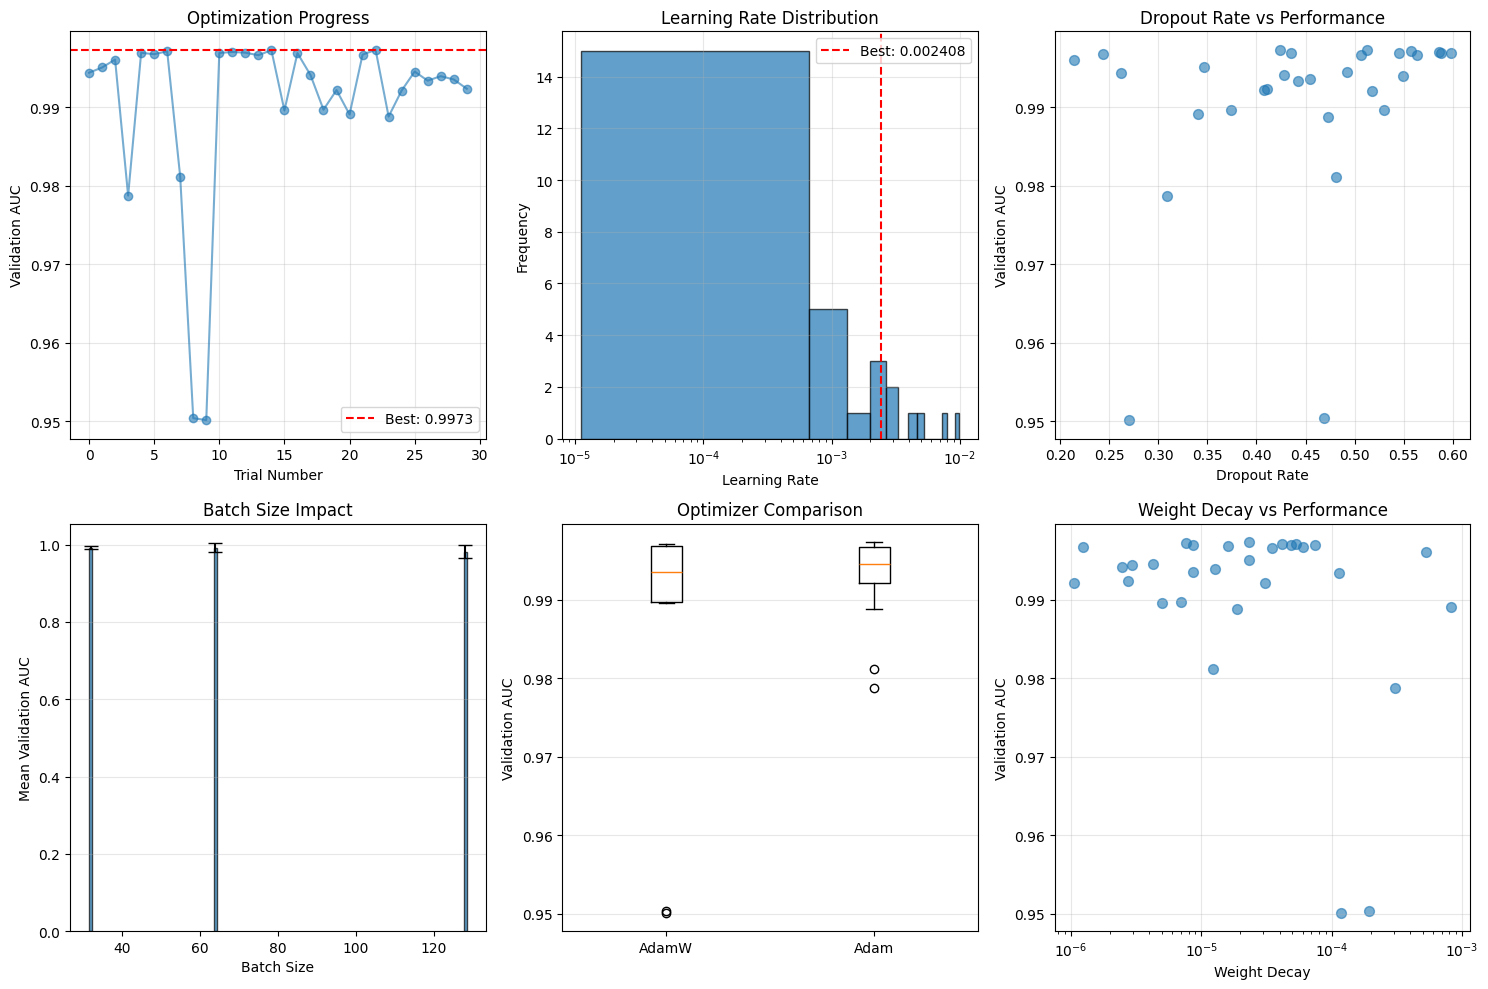


💾 Tuning results saved to 'optuna_trials.csv'
💾 Best hyperparameters saved to 'best_hyperparameters.txt'

RETRAINING WITH OPTIMIZED HYPERPARAMETERS
Optimized Model Parameters: 371,074

🚀 Training optimized model with best hyperparameters...

Epoch 1/20 | Train Loss: 0.1169, Acc: 0.8747 | Val Loss: 0.0489, Acc: 0.9427, AUC: 0.9903
Epoch 2/20 | Train Loss: 0.0488, Acc: 0.9463 | Val Loss: 0.0502, Acc: 0.9580, AUC: 0.9885
Epoch 3/20 | Train Loss: 0.0392, Acc: 0.9503 | Val Loss: 0.0541, Acc: 0.9275, AUC: 0.9872
Epoch 4/20 | Train Loss: 0.0373, Acc: 0.9569 | Val Loss: 0.0345, Acc: 0.9656, AUC: 0.9961
Epoch 5/20 | Train Loss: 0.0312, Acc: 0.9635 | Val Loss: 0.0260, Acc: 0.9599, AUC: 0.9956
Epoch 6/20 | Train Loss: 0.0316, Acc: 0.9622 | Val Loss: 0.0268, Acc: 0.9656, AUC: 0.9945
Epoch 7/20 | Train Loss: 0.0271, Acc: 0.9711 | Val Loss: 0.0212, Acc: 0.9656, AUC: 0.9974
Epoch 8/20 | Train Loss: 0.0284, Acc: 0.9684 | Val Loss: 0.0265, Acc: 0.9676, AUC: 0.9963
Epoch 9/20 | Train Loss: 0.0236, Acc:

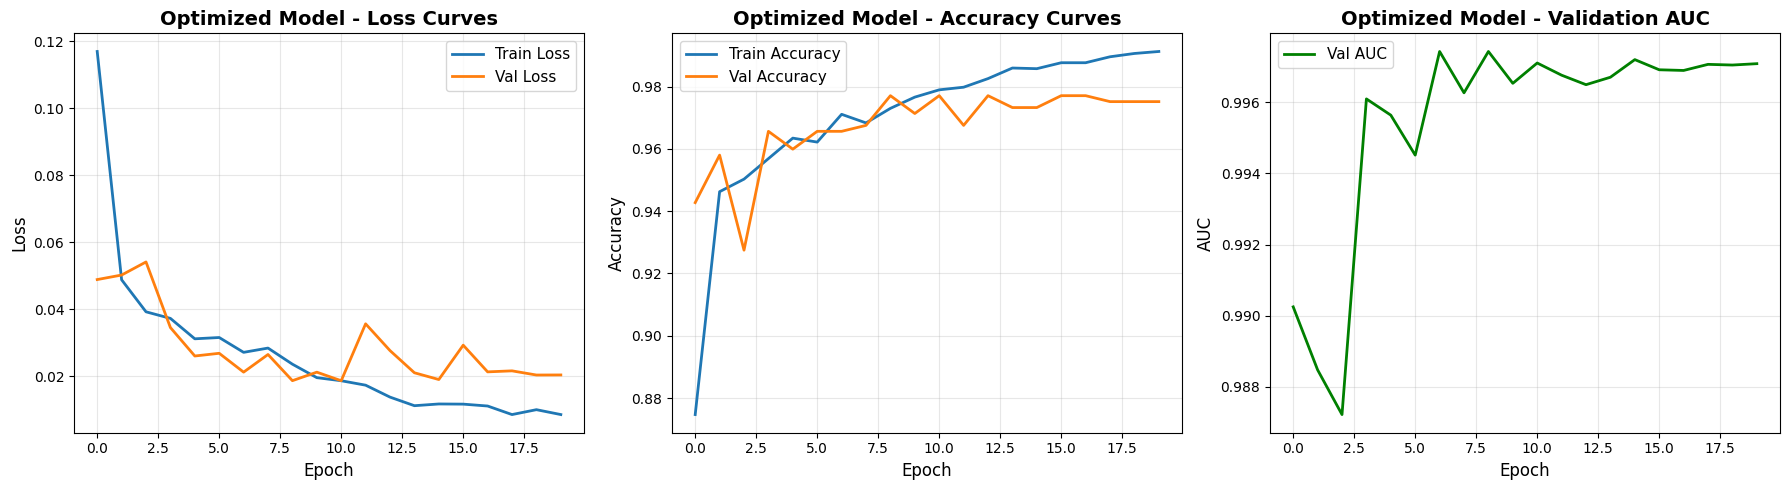


✅ Hyperparameter tuning section complete!


In [9]:
# ========================================
# HYPERPARAMETER TUNING SECTION
# ========================================

!pip install optuna
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
import plotly.io as pio

print("="*60)
print("HYPERPARAMETER TUNING WITH OPTUNA")
print("="*60)

# Define the objective function for Optuna
def objective(trial):
    """
    Objective function for hyperparameter optimization.
    Optuna will try to maximize validation AUC.
    """

    # Suggest hyperparameters
    lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    dropout = trial.suggest_uniform('dropout', 0.2, 0.6)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-3)
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'AdamW'])

    # Focal Loss hyperparameters
    focal_alpha = trial.suggest_uniform('focal_alpha', 0.5, 2.0)
    focal_gamma = trial.suggest_uniform('focal_gamma', 1.0, 3.0)

    # Architecture hyperparameters
    n_filters_1 = trial.suggest_categorical('n_filters_1', [16, 32, 64])
    n_filters_2 = trial.suggest_categorical('n_filters_2', [32, 64, 128])
    n_filters_3 = trial.suggest_categorical('n_filters_3', [64, 128, 256])

    # Create data loaders with suggested batch size
    trial_train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    trial_val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

    # Define a flexible CNN architecture based on suggested parameters
    class FlexibleCNN(nn.Module):
        def __init__(self, n_f1, n_f2, n_f3, dropout_rate):
            super(FlexibleCNN, self).__init__()
            self.features = nn.Sequential(
                nn.Conv2d(1, n_f1, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(n_f1),
                nn.MaxPool2d(2),
                nn.Dropout(dropout_rate * 0.5),

                nn.Conv2d(n_f1, n_f2, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(n_f2),
                nn.MaxPool2d(2),
                nn.Dropout(dropout_rate * 0.5),

                nn.Conv2d(n_f2, n_f3, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.BatchNorm2d(n_f3),
                nn.AdaptiveAvgPool2d((1, 1))
            )
            self.classifier = nn.Sequential(
                nn.Flatten(),
                nn.Dropout(dropout_rate),
                nn.Linear(n_f3, 2)
            )

        def forward(self, x):
            x = self.features(x)
            x = self.classifier(x)
            return x

    # Initialize model
    model = FlexibleCNN(n_filters_1, n_filters_2, n_filters_3, dropout).to(device)

    # Initialize optimizer
    if optimizer_name == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Initialize loss function
    criterion = FocalLoss(alpha=focal_alpha, gamma=focal_gamma)

    # Training for limited epochs (to speed up tuning)
    num_epochs = 10
    best_val_auc = 0.0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        for imgs, labels in trial_train_loader:
            imgs = imgs.to(device)
            labels = labels.squeeze().long().to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation phase
        model.eval()
        val_preds = []
        val_probs = []
        val_labels = []

        with torch.no_grad():
            for imgs, labels in trial_val_loader:
                imgs = imgs.to(device)
                labels = labels.squeeze()

                outputs = model(imgs)
                probs = torch.softmax(outputs, dim=1)[:, 1]

                val_probs.extend(probs.cpu().numpy())
                val_labels.extend(labels.numpy())

        # Calculate validation AUC
        val_auc = roc_auc_score(val_labels, val_probs)

        # Track best validation AUC
        if val_auc > best_val_auc:
            best_val_auc = val_auc

        # Report intermediate value for pruning
        trial.report(val_auc, epoch)

        # Prune trial if it's not promising
        if trial.should_prune():
            raise optuna.TrialPruned()

    return best_val_auc

# Create Optuna study
print("\n🔍 Starting hyperparameter search...")
print("This may take 15-30 minutes depending on your hardware.\n")

study = optuna.create_study(
    direction='maximize',  # Maximize validation AUC
    pruner=optuna.pruners.MedianPruner(n_startup_trials=5, n_warmup_steps=3),
    sampler=optuna.samplers.TPESampler(seed=42)
)

# Run optimization
study.optimize(objective, n_trials=30, timeout=1800)  # 30 trials or 30 minutes max

print("\n" + "="*60)
print("HYPERPARAMETER TUNING RESULTS")
print("="*60)

# Best trial results
print(f"\n🏆 Best Trial: #{study.best_trial.number}")
print(f"Best Validation AUC: {study.best_value:.4f}")
print(f"\n📊 Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key:20s}: {value}")

# ========================================
# VISUALIZATION OF TUNING RESULTS
# ========================================

# 1. Optimization History
fig1 = plot_optimization_history(study)
fig1.update_layout(
    title="Hyperparameter Optimization History",
    xaxis_title="Trial Number",
    yaxis_title="Validation AUC",
    font=dict(size=12),
    width=900,
    height=500
)
fig1.show()

# 2. Parameter Importances
fig2 = plot_param_importances(study)
fig2.update_layout(
    title="Hyperparameter Importance",
    xaxis_title="Importance",
    font=dict(size=12),
    width=900,
    height=500
)
fig2.show()

# 3. Create a detailed results table
trials_df = study.trials_dataframe()
trials_df = trials_df.sort_values('value', ascending=False)

print("\n📋 Top 5 Trials:")
print(trials_df[['number', 'value', 'params_learning_rate', 'params_batch_size',
                 'params_dropout', 'params_optimizer']].head())

# 4. Parallel Coordinate Plot
fig3 = optuna.visualization.plot_parallel_coordinate(
    study,
    params=['learning_rate', 'batch_size', 'dropout', 'weight_decay']
)
fig3.update_layout(
    title="Parallel Coordinate Plot - Hyperparameter Relationships",
    font=dict(size=11),
    width=1000,
    height=600
)
fig3.show()

# 5. Contour Plot (relationship between pairs of hyperparameters)
fig4 = optuna.visualization.plot_contour(
    study,
    params=['learning_rate', 'dropout']
)
fig4.update_layout(
    title="Contour Plot - Learning Rate vs Dropout",
    font=dict(size=12),
    width=800,
    height=600
)
fig4.show()

# 6. Manual visualization using matplotlib
plt.figure(figsize=(15, 10))

# Plot 1: Trial values over time
plt.subplot(2, 3, 1)
trial_numbers = [t.number for t in study.trials]
trial_values = [t.value for t in study.trials]
plt.plot(trial_numbers, trial_values, 'o-', alpha=0.6)
plt.axhline(y=study.best_value, color='r', linestyle='--', label=f'Best: {study.best_value:.4f}')
plt.xlabel('Trial Number')
plt.ylabel('Validation AUC')
plt.title('Optimization Progress')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Learning rate distribution
plt.subplot(2, 3, 2)
lrs = [t.params['learning_rate'] for t in study.trials]
plt.hist(lrs, bins=15, edgecolor='black', alpha=0.7)
plt.axvline(x=study.best_params['learning_rate'], color='r', linestyle='--',
            label=f"Best: {study.best_params['learning_rate']:.6f}")
plt.xlabel('Learning Rate')
plt.ylabel('Frequency')
plt.title('Learning Rate Distribution')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Dropout vs AUC
plt.subplot(2, 3, 3)
dropouts = [t.params['dropout'] for t in study.trials]
plt.scatter(dropouts, trial_values, alpha=0.6, s=50)
plt.xlabel('Dropout Rate')
plt.ylabel('Validation AUC')
plt.title('Dropout Rate vs Performance')
plt.grid(True, alpha=0.3)

# Plot 4: Batch size comparison
plt.subplot(2, 3, 4)
batch_sizes = [t.params['batch_size'] for t in study.trials]
batch_aucs = {}
for bs, auc in zip(batch_sizes, trial_values):
    if bs not in batch_aucs:
        batch_aucs[bs] = []
    batch_aucs[bs].append(auc)

batch_means = {bs: np.mean(aucs) for bs, aucs in batch_aucs.items()}
batch_stds = {bs: np.std(aucs) for bs, aucs in batch_aucs.items()}

plt.bar(batch_means.keys(), batch_means.values(), yerr=batch_stds.values(),
        capsize=5, alpha=0.7, edgecolor='black')
plt.xlabel('Batch Size')
plt.ylabel('Mean Validation AUC')
plt.title('Batch Size Impact')
plt.grid(True, alpha=0.3, axis='y')

# Plot 5: Optimizer comparison
plt.subplot(2, 3, 5)
optimizers = [t.params['optimizer'] for t in study.trials]
opt_aucs = {}
for opt, auc in zip(optimizers, trial_values):
    if opt not in opt_aucs:
        opt_aucs[opt] = []
    opt_aucs[opt].append(auc)

opt_data = [opt_aucs[opt] for opt in opt_aucs.keys()]
plt.boxplot(opt_data, labels=list(opt_aucs.keys()))
plt.ylabel('Validation AUC')
plt.title('Optimizer Comparison')
plt.grid(True, alpha=0.3, axis='y')

# Plot 6: Weight decay vs AUC
plt.subplot(2, 3, 6)
weight_decays = [t.params['weight_decay'] for t in study.trials]
plt.scatter(weight_decays, trial_values, alpha=0.6, s=50)
plt.xlabel('Weight Decay')
plt.ylabel('Validation AUC')
plt.title('Weight Decay vs Performance')
plt.xscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('hyperparameter_tuning_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ========================================
# SAVE TUNING RESULTS
# ========================================

# Save study results
trials_df.to_csv('optuna_trials.csv', index=False)
print("\n💾 Tuning results saved to 'optuna_trials.csv'")

# Save best parameters to a text file
with open('best_hyperparameters.txt', 'w') as f:
    f.write("BEST HYPERPARAMETERS FROM OPTUNA TUNING\n")
    f.write("="*50 + "\n\n")
    f.write(f"Best Validation AUC: {study.best_value:.4f}\n")
    f.write(f"Best Trial Number: {study.best_trial.number}\n\n")
    f.write("Hyperparameters:\n")
    for key, value in study.best_params.items():
        f.write(f"  {key}: {value}\n")

print("💾 Best hyperparameters saved to 'best_hyperparameters.txt'")

# ========================================
# RETRAIN WITH BEST HYPERPARAMETERS
# ========================================

print("\n" + "="*60)
print("RETRAINING WITH OPTIMIZED HYPERPARAMETERS")
print("="*60)

# Extract best parameters
best_params = study.best_params

# Create final model with best hyperparameters
class OptimizedCNN(nn.Module):
    def __init__(self):
        super(OptimizedCNN, self).__init__()
        n_f1 = best_params['n_filters_1']
        n_f2 = best_params['n_filters_2']
        n_f3 = best_params['n_filters_3']
        dropout = best_params['dropout']

        self.features = nn.Sequential(
            nn.Conv2d(1, n_f1, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(n_f1),
            nn.MaxPool2d(2),
            nn.Dropout(dropout * 0.5),

            nn.Conv2d(n_f1, n_f2, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(n_f2),
            nn.MaxPool2d(2),
            nn.Dropout(dropout * 0.5),

            nn.Conv2d(n_f2, n_f3, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(n_f3),
            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(dropout),
            nn.Linear(n_f3, 2)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Initialize optimized model
optimized_model = OptimizedCNN().to(device)
print(f"Optimized Model Parameters: {count_parameters(optimized_model):,}")

# Setup training with best hyperparameters
best_lr = best_params['learning_rate']
best_batch_size = best_params['batch_size']
best_weight_decay = best_params['weight_decay']
best_optimizer_name = best_params['optimizer']

# Create data loaders with optimal batch size
optimized_train_loader = DataLoader(train_dataset, batch_size=best_batch_size, shuffle=True, num_workers=0)
optimized_val_loader = DataLoader(val_dataset, batch_size=best_batch_size, shuffle=False, num_workers=0)
optimized_test_loader = DataLoader(test_dataset, batch_size=best_batch_size, shuffle=False, num_workers=0)

# Initialize optimizer
if best_optimizer_name == 'Adam':
    optimized_optimizer = torch.optim.Adam(
        optimized_model.parameters(),
        lr=best_lr,
        weight_decay=best_weight_decay
    )
else:
    optimized_optimizer = torch.optim.AdamW(
        optimized_model.parameters(),
        lr=best_lr,
        weight_decay=best_weight_decay
    )

# Initialize criterion with best Focal Loss parameters
optimized_criterion = FocalLoss(
    alpha=best_params['focal_alpha'],
    gamma=best_params['focal_gamma']
)

# Learning rate scheduler
optimized_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimized_optimizer,
    T_max=20,
    eta_min=1e-6
)

# Training function with tracking
def train_optimized_model(model, train_loader, val_loader, optimizer, criterion, scheduler, epochs=20):
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    val_aucs = []

    best_val_auc = 0.0
    best_epoch = 0

    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for imgs, labels in train_loader:
            imgs = imgs.to(device)
            labels = labels.squeeze().long().to(device)

            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Validation phase
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        val_probs = []
        val_labels_list = []

        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs = imgs.to(device)
                labels_cpu = labels.squeeze()
                labels = labels_cpu.long().to(device)

                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                probs = torch.softmax(outputs, dim=1)[:, 1]
                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                val_probs.extend(probs.cpu().numpy())
                val_labels_list.extend(labels_cpu.numpy())

        val_loss = val_loss / len(val_loader)
        val_acc = correct / total
        val_auc = roc_auc_score(val_labels_list, val_probs)

        val_losses.append(val_loss)
        val_accs.append(val_acc)
        val_aucs.append(val_auc)

        # Track best model
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            best_epoch = epoch
            torch.save(model.state_dict(), 'best_optimized_model.pth')

        # Update learning rate
        scheduler.step()

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, AUC: {val_auc:.4f}")

    print(f"\n✅ Best validation AUC: {best_val_auc:.4f} at epoch {best_epoch+1}")

    return train_losses, val_losses, train_accs, val_accs, val_aucs

# Train the optimized model
print("\n🚀 Training optimized model with best hyperparameters...\n")
train_losses_opt, val_losses_opt, train_accs_opt, val_accs_opt, val_aucs_opt = train_optimized_model(
    optimized_model, optimized_train_loader, optimized_val_loader,
    optimized_optimizer, optimized_criterion, optimized_scheduler,
    epochs=20
)

# Plot training curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss curve
axes[0].plot(train_losses_opt, label='Train Loss', linewidth=2)
axes[0].plot(val_losses_opt, label='Val Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Optimized Model - Loss Curves', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy curve
axes[1].plot(train_accs_opt, label='Train Accuracy', linewidth=2)
axes[1].plot(val_accs_opt, label='Val Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Optimized Model - Accuracy Curves', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Validation AUC curve
axes[2].plot(val_aucs_opt, label='Val AUC', linewidth=2, color='green')
axes[2].set_xlabel('Epoch', fontsize=12)
axes[2].set_ylabel('AUC', fontsize=12)
axes[2].set_title('Optimized Model - Validation AUC', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimized_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Hyperparameter tuning section complete!")
print("="*60)